## 制作自己的数据集

### 要解决的问题：
    1.实体样本与数据样本（先找图再变成数组）
    2.样本标注问题（通过某种方式把图（样本）本身的内容做成标签对应到标注中，形成标注数组）
    3.入网之前的数据结构

### how:
    1.样本的获取（官方数据集...）
    2.样本的预处理（尺寸统一与网络匹配，对文件进行标注）
    3.入网前数据预处理（图片转numpy数组，读取标签转onehot）

In [1]:
import os
import random
from PIL import Image
root = 'C:\\Users\\whfo\\Downloads\\第24讲资料和源码.zip\\第6讲资料和源码\\猫狗数据集\\'
for mydir in os.listdir(root):
    print(mydir)
    break
    for files in os.listdir(root+mydir):
#         print(files)
        try:
            img = Image.open(root+mydir+'/'+files)
            img = img.resize((100,100))
            print(root+mydir+'/'+files)
            img.save(root+mydir+'/'+files)
        except:
            os.remove(root+mydir+'/'+files)

__MACOSX


In [1]:
import os
import random
from PIL import Image

root = 'C:\\Users\\whfo\\Downloads\\第24讲资料和源码.zip\\第6讲资料和源码\\猫狗数据集\\'
counter = 0
for mydir in os.listdir(root):
    print(mydir)
    
#     for files in os.listdir(root+mydir):
#         os.rename(root+mydir+'/'+str(files),root+mydir+'/'+str(counter)+'_'+str(files))
#     counter += 1
    

__MACOSX
狗
猫


### train_dogs

In [6]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
from keras.models import Sequential
import numpy as np
import os
from PIL import Image


In [10]:
dataset_path = 'C:\\Users\\whfo\\Downloads\\第24讲资料和源码.zip\\第6讲资料和源码\\猫狗数据集\\'
n_class = 2
epochs = 10
batchsize = 256

In [4]:
x = [] #建立一个样本列表
y = [] #建立一个标注列表
cnt = 0
for mydir in os.listdir(dataset_path):
#     print(mydir)
    for file in os.listdir(dataset_path+mydir):
        if file == '.DS_Store':
            os.remove(dataset_path+mydir+'\\'+file)
#         print(file+'1')              
        else:
#             print(dataset_path+mydir+'\\'+file)
            img = Image.open(dataset_path+mydir+'\\'+file) #读取图片
            img = np.array(img)
#             print(img)
            label = int(str(file).split('_')[0]) #获取标签
#             print(label)
            x.append(img)
            y.append(label)
            cnt+=1
            if cnt==1000:
                cnt=0
                break
#             break
    
#样本列表转np数组
x_train = np.array(x).astype('float32')/255.0
y_train = np.array(y)
y_train = to_categorical(y=y_train, num_classes=n_class)
print(x_train.shape)
print(y_train.shape)

(2000, 100, 100, 3)
(2000, 2)


In [7]:
# plt.imshow(x_train[1])
# plt.savefig('acb.jpg')
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(100,100,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(n_class,activation='softmax'))

In [11]:
model.compile(optimizer=Adam(), loss=categorical_crossentropy,metrics=['accuracy'])
history = model.fit(
          x_train,
          y_train,
          epochs=epochs,
          batch_size=batchsize,
          shuffle=True,
          validation_split=0.1
          )
model.save('../output/DOGsOCR/dogcatOCR.h5')

Epoch 1/10
8/8 [==============================] - 36s 3s/step - loss: 0.6381 - accuracy: 0.6256 - val_loss: 0.7979 - val_accuracy: 0.3700
Epoch 2/10
8/8 [==============================] - 22s 3s/step - loss: 0.6286 - accuracy: 0.6478 - val_loss: 0.6777 - val_accuracy: 0.6400
Epoch 3/10
8/8 [==============================] - 22s 3s/step - loss: 0.6187 - accuracy: 0.6722 - val_loss: 0.6540 - val_accuracy: 0.6450
Epoch 4/10
8/8 [==============================] - 21s 3s/step - loss: 0.6042 - accuracy: 0.6706 - val_loss: 0.5713 - val_accuracy: 0.7750
Epoch 5/10
8/8 [==============================] - 23s 3s/step - loss: 0.5807 - accuracy: 0.6961 - val_loss: 0.6511 - val_accuracy: 0.6650
Epoch 6/10
8/8 [==============================] - 23s 3s/step - loss: 0.5770 - accuracy: 0.6939 - val_loss: 0.8269 - val_accuracy: 0.4300
Epoch 7/10
8/8 [==============================] - 23s 3s/step - loss: 0.5929 - accuracy: 0.6861 - val_loss: 0.6071 - val_accuracy: 0.7100
Epoch 8/10
8/8 [==================

In [23]:
print(x)
print(y)

[array([[[134, 118, 119],
        [150, 136, 135],
        [157, 143, 142],
        ...,
        [133, 131, 144],
        [137, 135, 148],
        [117, 115, 128]],

       [[162, 146, 147],
        [161, 145, 145],
        [153, 139, 138],
        ...,
        [110, 109, 123],
        [103, 102, 116],
        [ 85,  84,  98]],

       [[176, 157, 159],
        [168, 152, 152],
        [155, 141, 140],
        ...,
        [106, 107, 125],
        [ 83,  84, 102],
        [ 62,  63,  81]],

       ...,

       [[124, 150, 185],
        [119, 143, 177],
        [128, 151, 182],
        ...,
        [141, 138, 123],
        [138, 136, 123],
        [136, 134, 121]],

       [[120, 146, 181],
        [119, 143, 177],
        [130, 153, 184],
        ...,
        [144, 141, 126],
        [138, 136, 123],
        [135, 133, 120]],

       [[111, 137, 172],
        [115, 139, 173],
        [131, 154, 185],
        ...,
        [141, 138, 123],
        [134, 132, 119],
        [133, 131, 118]

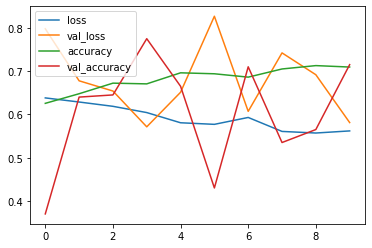

In [13]:
#loss输出

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend(["loss","val_loss","accuracy","val_accuracy"],loc="upper left")

plt.savefig('../output/DOGsOCR/accloss.jpg')